In [1]:
import pandas as pd
import numpy as np

In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.12.0-rc0'

In [4]:
import tensorflow_hub as hub

In [5]:
label_csv = pd.read_csv("dog-breed-identification/labels.csv")

In [6]:
label_csv.describe

<bound method NDFrame.describe of                                      id                     breed
0      000bec180eb18c7604dcecc8fe0dba07               boston_bull
1      001513dfcb2ffafc82cccf4d8bbaba97                     dingo
2      001cdf01b096e06d78e9e5112d419397                  pekinese
3      00214f311d5d2247d5dfe4fe24b2303d                  bluetick
4      0021f9ceb3235effd7fcde7f7538ed62          golden_retriever
...                                 ...                       ...
10217  ffd25009d635cfd16e793503ac5edef0                    borzoi
10218  ffd3f636f7f379c51ba3648a9ff8254f            dandie_dinmont
10219  ffe2ca6c940cddfee68fa3cc6c63213f                  airedale
10220  ffe5f6d8e2bff356e9482a80a6e29aac        miniature_pinscher
10221  fff43b07992508bc822f33d8ffd902ae  chesapeake_bay_retriever

[10222 rows x 2 columns]>

In [7]:
label_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

<AxesSubplot: >

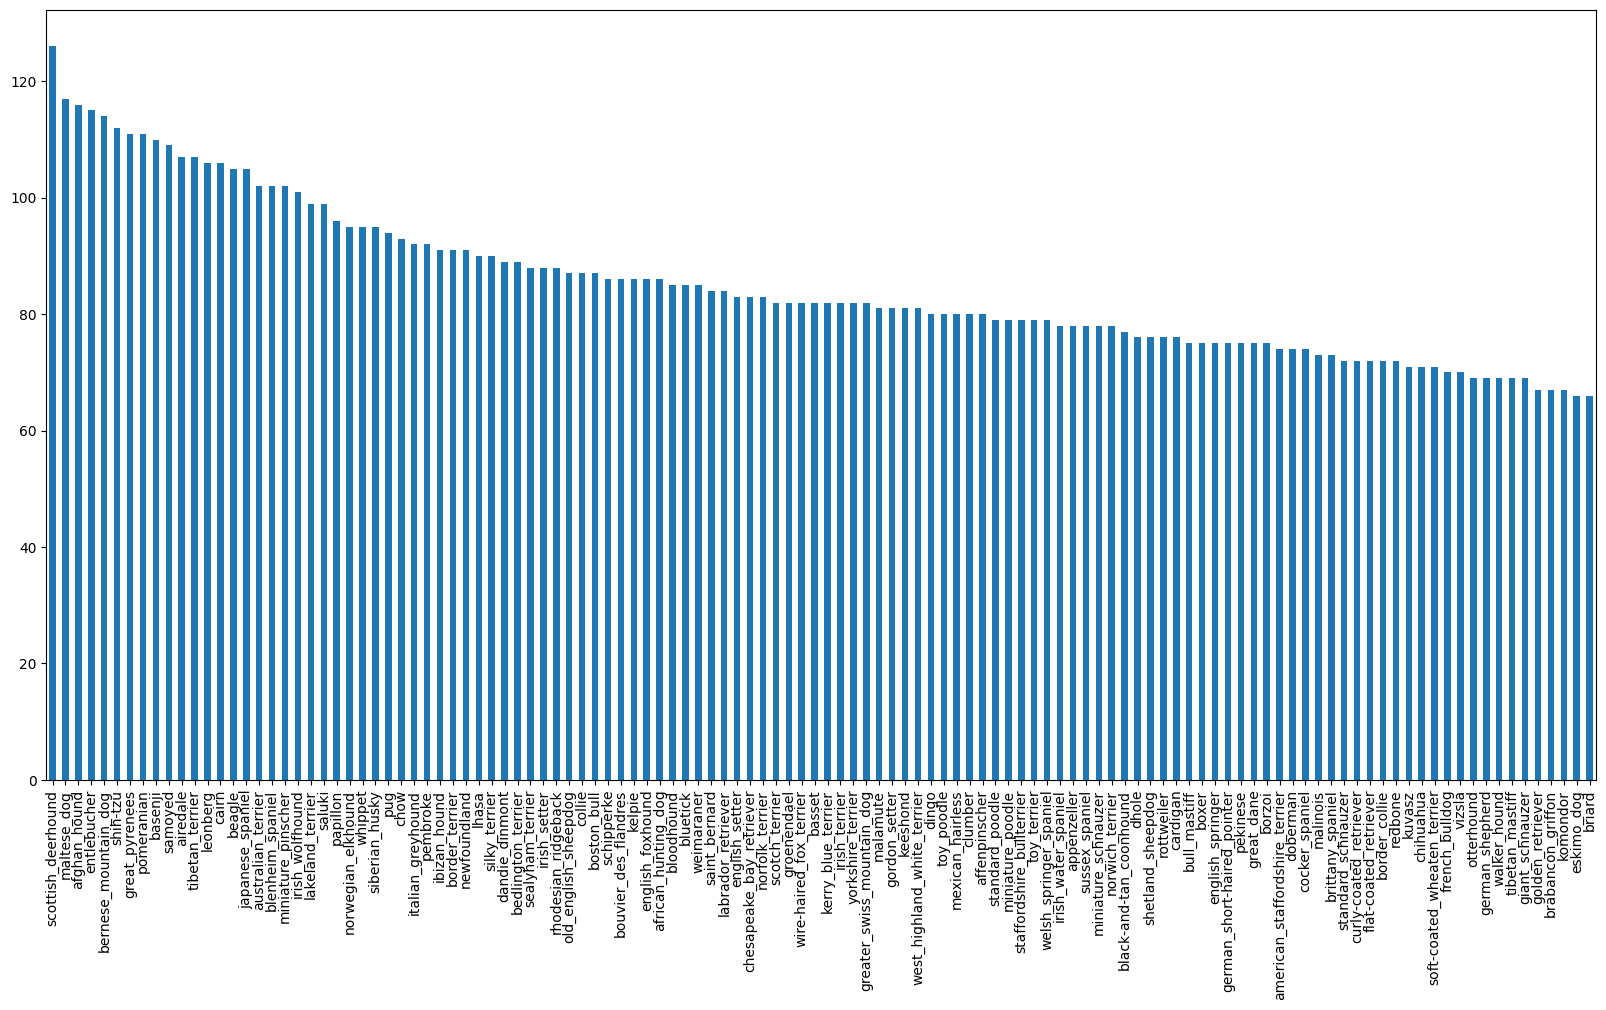

In [8]:
label_csv["breed"].value_counts().plot.bar(figsize = (20,10))

In [9]:
label_csv["breed"].value_counts().sum()/len(label_csv["breed"].value_counts())

85.18333333333334

In [10]:
label_csv["breed"].value_counts().median()

82.0

In [11]:
from IPython.display import Image

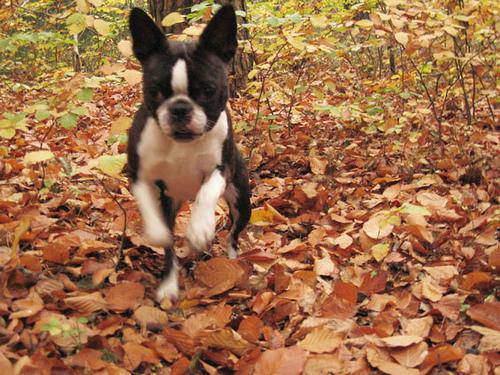

In [12]:
Image("dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

In [13]:
filenames = ["dog-breed-identification/train/"+fname+".jpg" for fname in label_csv["id"]]

In [14]:
labels = np.array(label_csv["breed"])

In [15]:
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [16]:
len(unique_breeds[2]==unique_breeds)

120

In [17]:
boolean_labels = [label==unique_breeds for label in labels]
boolean_labels

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [18]:
X = filenames
Y = boolean_labels

In [19]:
NUM_IMAGES = 1000

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val = train_test_split(X[:NUM_IMAGES],Y[:NUM_IMAGES],test_size = 0.2,random_state=42)
X_train[:5], Y_train[:2]

(['dog-breed-identification/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'dog-breed-identification/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'dog-breed-identification/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'dog-breed-identification/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'dog-breed-identification/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, 

In [21]:
from matplotlib.pyplot import imread

image = imread(filenames[42])
image.shape

(257, 350, 3)

In [22]:
image.max(), image.min()

(255, 0)

In [23]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)>

In [24]:
IMG_SIZE = 224
def process_image(image_path):
     image = tf.io.read_file(image_path)
     image = tf.image.decode_jpeg(image, channels=3)
     image = tf.image.convert_image_dtype(image, tf.float32)
     image = tf.image.resize(image, size=[IMG_SIZE,IMG_SIZE])

     return image

In [25]:
def image_label(image_path,label):
    image = process_image(image_path)
    return image, label

In [26]:
(process_image(X[42]),tf.constant(Y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117759],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

In [27]:
def create_data_batches(X,Y=None,batch_size=32,valid_data=False,test_data=False):
    if test_data:
        print("Creating test data batches....")
        data = tf.data.Dataset.from_tensor_slices(tf.constant(X))
        data_batch = data.map(process_image).batch(batch_size)
        return data_batch

    elif valid_data:
        print("Creating validation data batches....")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(Y)))
        data_batch = data.map(image_label).batch(batch_size)
        return data_batch

    else:
        print("Creating training data batches....")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(Y)))
        data = data.shuffle(buffer_size=len(X))
        data_batch = data.map(image_label).batch(batch_size)
        return data_batch

In [28]:
train_data = create_data_batches(X_train,Y_train)
val_data = create_data_batches(X_val,Y_val,valid_data=True)

Creating training data batches....
Creating validation data batches....


In [29]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [30]:
from matplotlib import pyplot as plt
def show_images(image,labels):
    plt.figure(figsize=(20,20))

    for i in range(25):
        ax = plt.subplot(5,5,i+1)
        plt.imshow(image[i])
        plt.title(unique_breeds[labels[i].argmax()])

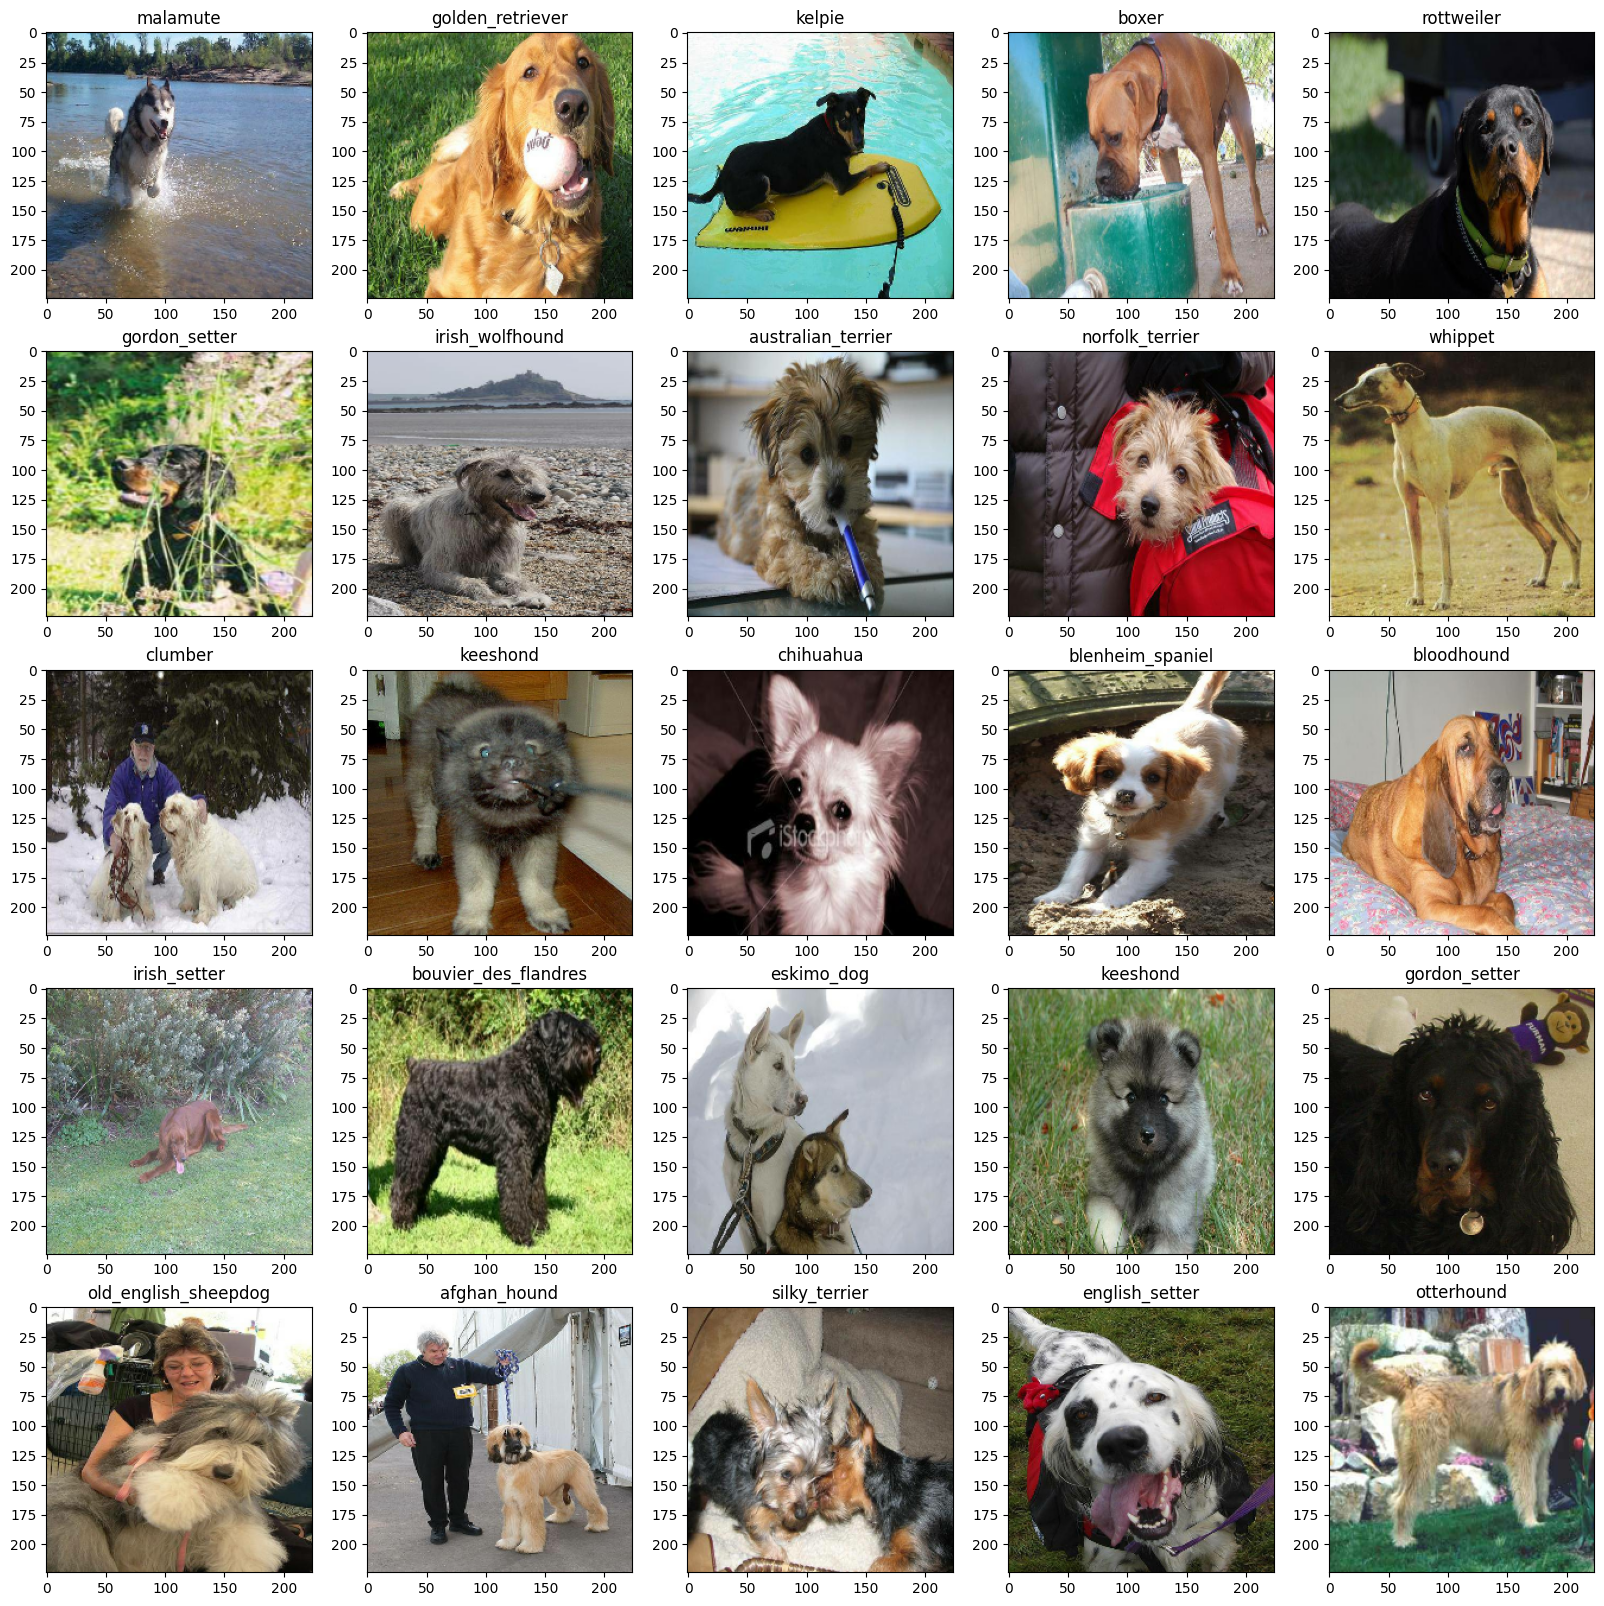

In [31]:
train_images, train_labels = next(train_data.as_numpy_iterator())
show_images(train_images,train_labels)

In [32]:
INPUT_SHAPE = [None, 224, 224, 3]
OUTPUT_SHAPE = len(unique_breeds)

MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

In [33]:
def create_model(input_shape=INPUT_SHAPE,output_shape=OUTPUT_SHAPE,model_url=MODEL_URL):
    print("Building model.....")
    model = tf.keras.Sequential([hub.KerasLayer(MODEL_URL),tf.keras.layers.Dense(units=OUTPUT_SHAPE,activation="softmax")])

    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
    model.build(INPUT_SHAPE)

    return model

In [34]:
model = create_model()
model.summary()

Building model.....
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [35]:
%load_ext tensorboard

In [36]:
import datetime, os

def create_tensorboard_callback():
    logdir = os.path.join("logs",datetime.datetime.now().strftime("%Y-%M-%D--%H-%M-%S"))
    return tf.keras.callbacks.TensorBoard(logdir)
    

In [37]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=3)

In [38]:
NUM_EPOCHS = 100

In [39]:
def train_model():
    model = create_model()
    tensorboard = create_tensorboard_callback()
    model.fit(x=train_data,epochs=NUM_EPOCHS,validation_data=val_data,validation_freq=1,callbacks=[tensorboard,early_stopping])
    return model

In [40]:
model = train_model()

Building model.....
Epoch 1/100
25/25 [==============================] - 29s 831ms/step - loss: 4.6555 - accuracy: 0.0850 - val_loss: 3.4136 - val_accuracy: 0.2650
Epoch 2/100
25/25 [==============================] - 19s 756ms/step - loss: 1.6979 - accuracy: 0.6612 - val_loss: 2.1202 - val_accuracy: 0.4950
Epoch 3/100
25/25 [==============================] - 20s 814ms/step - loss: 0.5777 - accuracy: 0.9463 - val_loss: 1.6481 - val_accuracy: 0.5600
Epoch 4/100
25/25 [==============================] - 20s 801ms/step - loss: 0.2571 - accuracy: 0.9912 - val_loss: 1.4597 - val_accuracy: 0.6150
Epoch 5/100
25/25 [==============================] - 19s 780ms/step - loss: 0.1484 - accuracy: 0.9937 - val_loss: 1.3755 - val_accuracy: 0.6200
Epoch 6/100
25/25 [==============================] - 19s 757ms/step - loss: 0.1009 - accuracy: 1.0000 - val_loss: 1.3249 - val_accuracy: 0.6500
Epoch 7/100
25/25 [==============================] - 19s 752ms/step - loss: 0.0759 - accuracy: 1.0000 - val_loss: 1.

In [41]:
predictions = model.predict(val_data,verbose=1)
predictions

7/7 [==============================] - 5s 673ms/step


array([[8.7886647e-04, 1.6057368e-03, 8.8494900e-04, ..., 5.7007902e-04,
        1.7568983e-04, 5.0829845e-03],
       [1.0995271e-03, 1.4365544e-03, 5.6068846e-03, ..., 1.3185474e-04,
        1.6225945e-03, 2.2569233e-04],
       [1.0020540e-05, 4.7713793e-06, 3.2102260e-05, ..., 3.4701041e-04,
        1.6614980e-05, 3.2723858e-04],
       ...,
       [3.0842518e-06, 3.9468821e-05, 2.8686415e-04, ..., 2.0544323e-05,
        1.1449985e-04, 8.2293278e-05],
       [1.0099743e-02, 5.5941881e-04, 8.1252911e-05, ..., 3.5330839e-04,
        2.9597431e-04, 7.7378890e-03],
       [1.8395321e-03, 5.2904128e-05, 1.6000913e-03, ..., 1.1275176e-02,
        5.5937185e-03, 1.1789144e-04]], dtype=float32)

In [42]:
np.max(predictions[0])

0.23125279

In [43]:
unique_breeds[np.argmax(predictions[0])]

'cairn'

In [44]:
def get_pred_label(pred_prob):
    return unique_breeds[np.argmax(pred_prob)]

pred_label = get_pred_label(predictions[81])
pred_label

'dingo'

In [45]:
images_ = []
labels_ = []

for image, label in val_data.unbatch().as_numpy_iterator():
    images_.append(image)
    labels_.append(label)

images_[0], labels_[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [46]:
get_pred_label(labels_[0])

'cairn'

In [47]:
def unbatchify(data):
  images = []
  labels = []
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [48]:
def plot_pred(pred_prob,labels,images,n=1):
    predprob, true_label, image = pred_prob[n], labels[n], images[n]
    pred_label= get_pred_label(predprob)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    if pred_label==true_label:
        color = "green"
    else:
        color = "red"

    plt.title("{} {:2.0f}% {}".format(pred_label,np.max(predprob)*100,true_label),color = color)

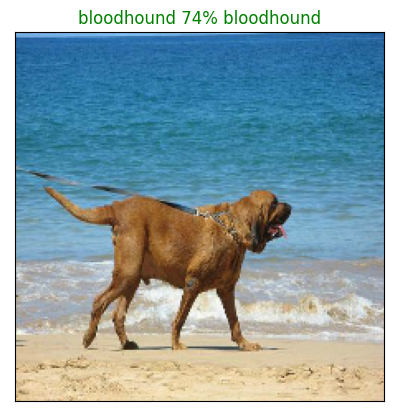

In [49]:
plot_pred(predictions,val_labels,val_images,n=100)

In [50]:
def plot_pred_conf(pred_prob,labels,n=1):
    predprob, true_label = pred_prob[n], labels[n]

    pred_label = get_pred_label(predprob)

    top_10_pred_indx = predprob.argsort()[-10:][::-1]

    top_10_pred_val = predprob[top_10_pred_indx]

    top_10_pred_label = unique_breeds[top_10_pred_indx]

    top_plot = plt.bar(np.arange(len(top_10_pred_label)),top_10_pred_val,color="grey")
    plt.xticks(np.arange(len(top_10_pred_label)),labels=top_10_pred_label,rotation="vertical")

    if np.isin(true_label,top_10_pred_label):
            top_plot[np.argmax(top_10_pred_label==true_label)].set_color("green")
    else:
        pass

    

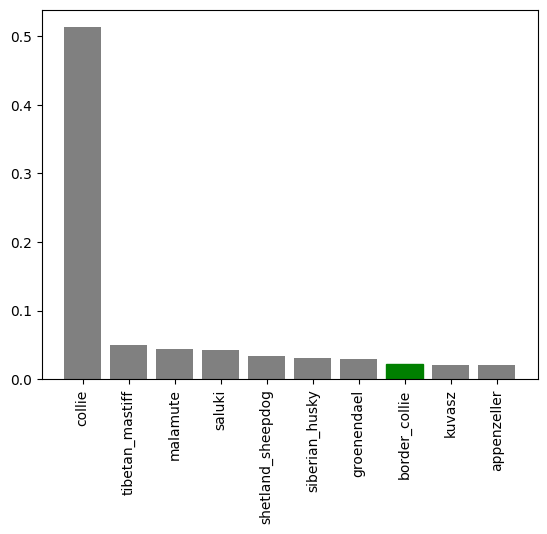

In [51]:
plot_pred_conf(pred_prob=predictions, labels = val_labels,n=9)

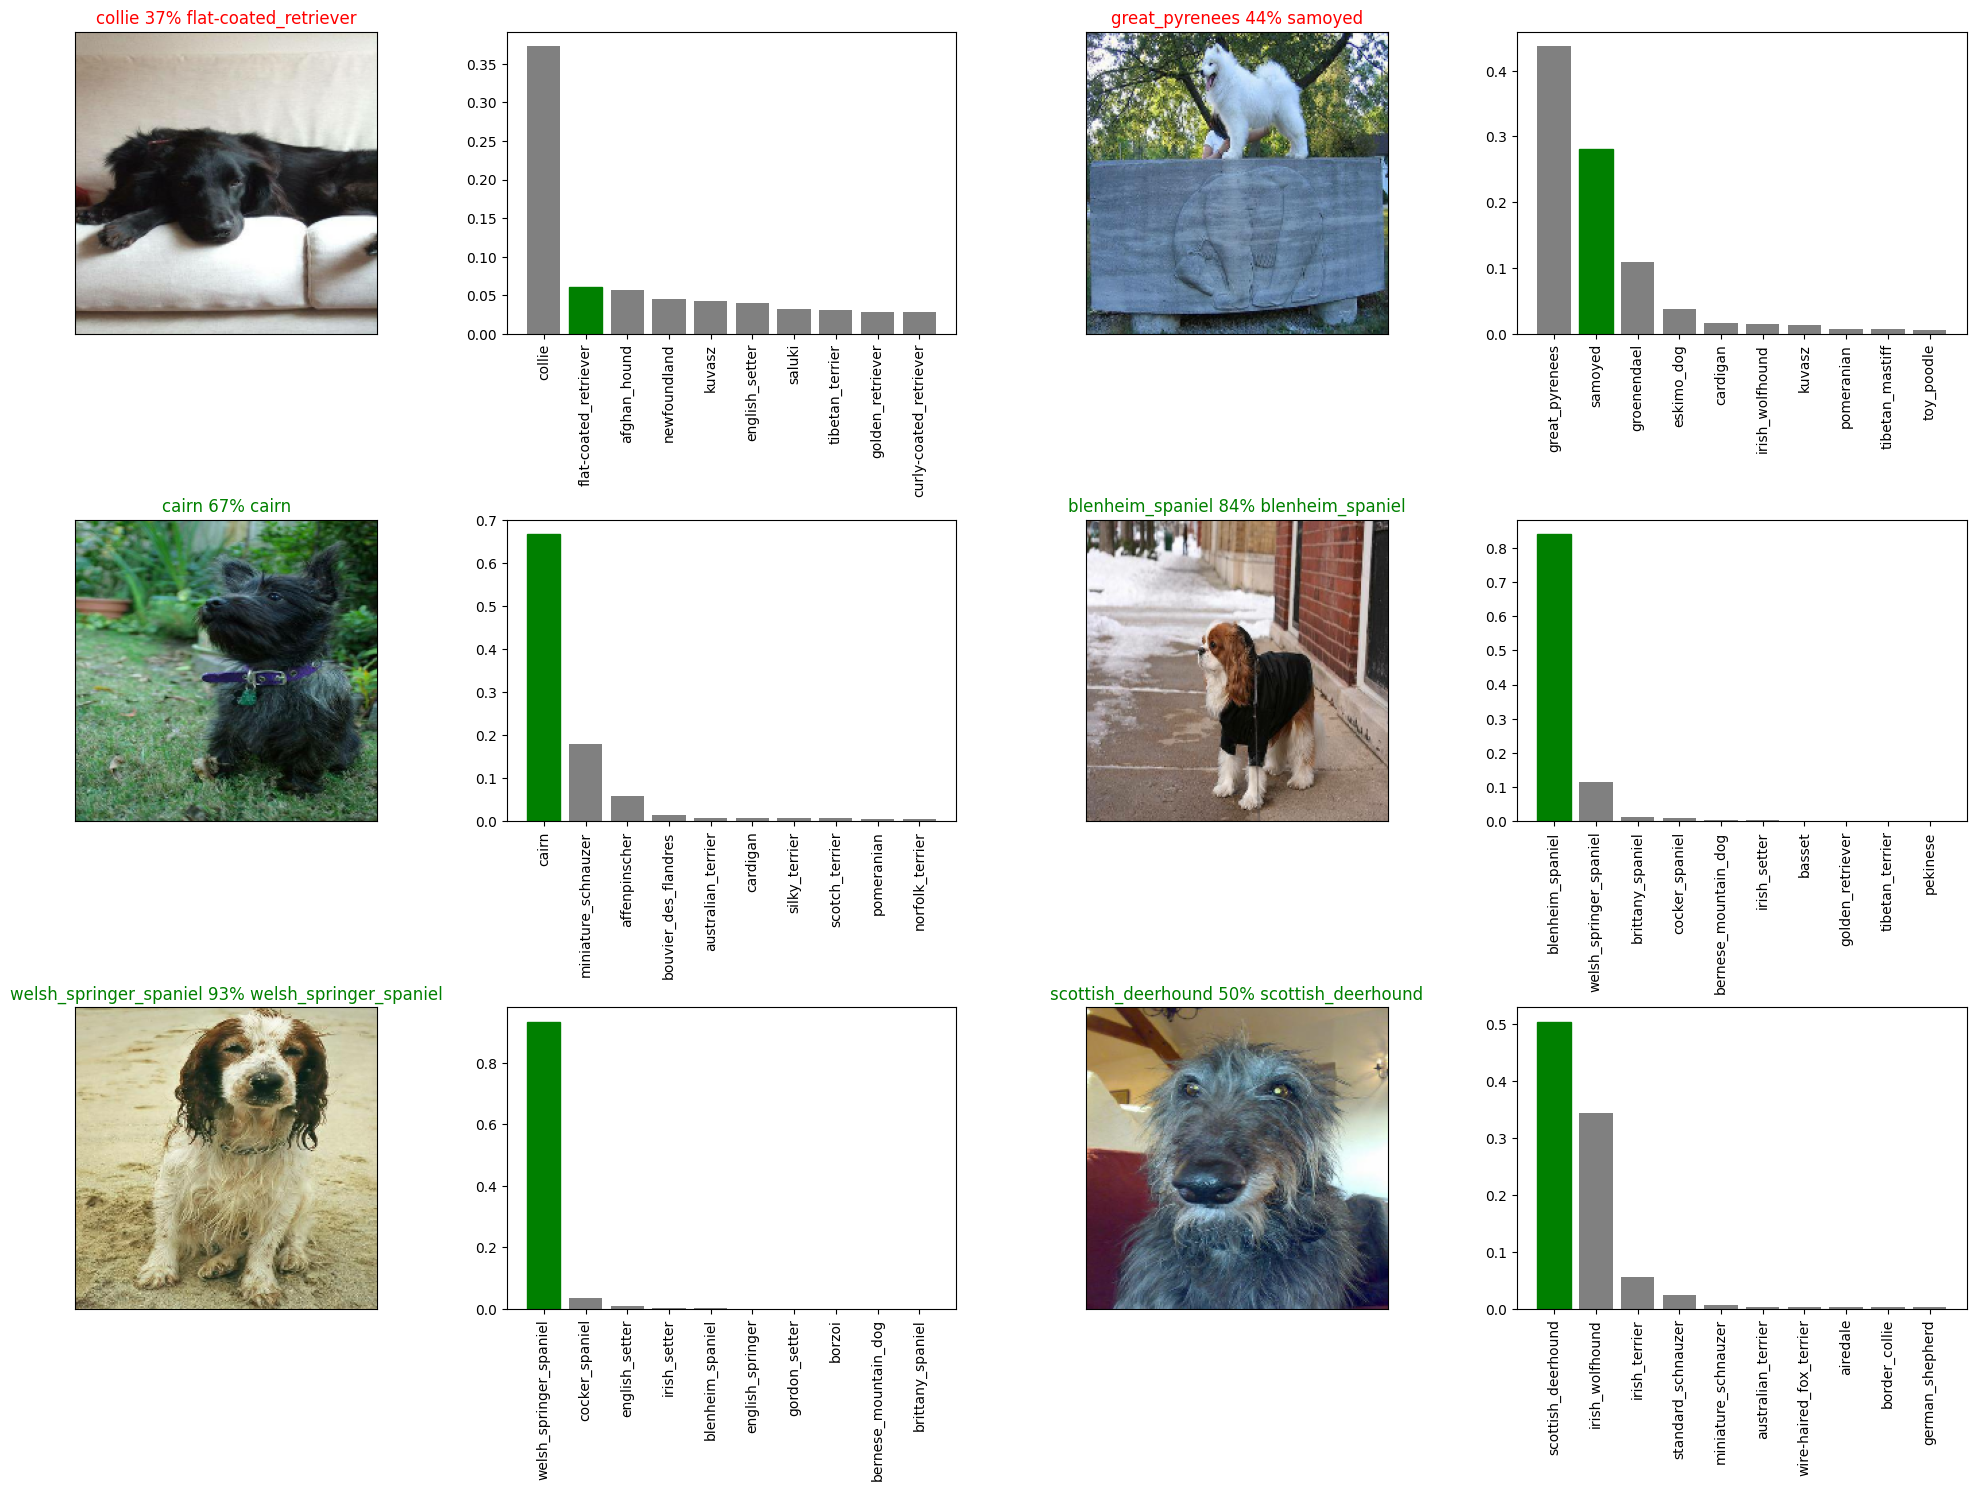

In [52]:
i_multiplier = 20
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols,5*num_rows))
for i in range(num_images):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_pred(pred_prob=predictions, labels=val_labels,images=val_images,n=i+i_multiplier)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_pred_conf(pred_prob=predictions,labels=val_labels,n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()


In [53]:
def save_model(model, suffix=None):
    print("Saving model...")
    modeldir = os.path.join("models",datetime.datetime.now().strftime("%Y%M%D-%H%M%S"))
    model_path = modeldir + "-" + suffix + ".h5"
    model.save(model_path)
    return model_path

In [54]:
def load_model(model_path):
    print("Loading model...")
    model = tf.keras.models.load_model(model_path,custom_objects={"KerasLayer":hub.KerasLayer})
    return model

In [55]:
save_model(model, suffix="1000-images-Adam")

Saving model...


'models\\20231712/30/23-191734-1000-images-Adam.h5'

In [56]:
loaded_model = load_model('models\\20232405/26/23-182422-1000-images-Adam.h5')

Loading model...


In [57]:
model.evaluate(val_data)

7/7 [==============================] - 4s 506ms/step - loss: 1.2656 - accuracy: 0.6500


[1.265577793121338, 0.6499999761581421]

In [58]:
loaded_model.evaluate(val_data)

7/7 [==============================] - 5s 562ms/step - loss: 1.2667 - accuracy: 0.6550


[1.266686201095581, 0.6549999713897705]

FULL TRAINING OF MODEL

In [59]:
len(X),len(Y)

(10222, 10222)

In [60]:
full_data = create_data_batches(X,Y)

Creating training data batches....


In [61]:
full_model = create_model()

Building model.....


In [62]:
full_model_tensorboard = create_tensorboard_callback()
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",patience=3)

In [63]:
full_model.fit(x=full_data,epochs = NUM_EPOCHS, callbacks = [full_model_tensorboard,full_model_early_stopping])

Epoch 1/100


320/320 [==============================] - 234s 711ms/step - loss: 1.3323 - accuracy: 0.6760
Epoch 2/100
320/320 [==============================] - 204s 637ms/step - loss: 0.3970 - accuracy: 0.8848
Epoch 3/100
320/320 [==============================] - 204s 638ms/step - loss: 0.2341 - accuracy: 0.9355
Epoch 4/100
320/320 [==============================] - 205s 639ms/step - loss: 0.1525 - accuracy: 0.9645
Epoch 5/100
320/320 [==============================] - 205s 640ms/step - loss: 0.1060 - accuracy: 0.9790
Epoch 6/100
320/320 [==============================] - 205s 642ms/step - loss: 0.0789 - accuracy: 0.9857
Epoch 7/100
320/320 [==============================] - 205s 641ms/step - loss: 0.0566 - accuracy: 0.9916
Epoch 8/100
320/320 [==============================] - 205s 639ms/step - loss: 0.0452 - accuracy: 0.9948
Epoch 9/100
320/320 [==============================] - 204s 637ms/step - loss: 0.0378 - accuracy: 0.9961
Epoch 10/100
320/320 [==============================] - 206s 644ms/

In [ ]:
save_model(full_model, suffix="all-images-Adam")

Saving model...


'models\\20232305/26/23-202341-all-images-Adam.h5'

In [ ]:
test_path = "dog-breed-identification/test/"
test_filenames = [test_path + fnames for fnames in os.listdir(test_path)]
test_filenames

['dog-breed-identification/test/000621fb3cbb32d8935728e48679680e.jpg',
 'dog-breed-identification/test/00102ee9d8eb90812350685311fe5890.jpg',
 'dog-breed-identification/test/0012a730dfa437f5f3613fb75efcd4ce.jpg',
 'dog-breed-identification/test/001510bc8570bbeee98c8d80c8a95ec1.jpg',
 'dog-breed-identification/test/001a5f3114548acdefa3d4da05474c2e.jpg',
 'dog-breed-identification/test/00225dcd3e4d2410dd53239f95c0352f.jpg',
 'dog-breed-identification/test/002c2a3117c2193b4d26400ce431eebd.jpg',
 'dog-breed-identification/test/002c58d413a521ae8d1a5daeb35fc803.jpg',
 'dog-breed-identification/test/002f80396f1e3db687c5932d7978b196.jpg',
 'dog-breed-identification/test/0036c6bcec6031be9e62a257b1c3c442.jpg',
 'dog-breed-identification/test/0041940322116ae58c38130f5a6f71f9.jpg',
 'dog-breed-identification/test/0042d6bf3e5f3700865886db32689436.jpg',
 'dog-breed-identification/test/004476c96f575879af4af471af65cae8.jpg',
 'dog-breed-identification/test/00485d47de966a9437ad3b33ac193b6f.jpg',
 'dog-

In [ ]:
test_data = create_data_batches(test_filenames,test_data=True)

Creating test data batches....


In [ ]:
test_preds = full_model.predict(test_data,verbose=1)

324/324 [==============================] - 290s 895ms/step


In [ ]:
np.savetxt("preds_array.csv",test_preds,delimiter=",")

In [ ]:
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
test_ids

['000621fb3cbb32d8935728e48679680e',
 '00102ee9d8eb90812350685311fe5890',
 '0012a730dfa437f5f3613fb75efcd4ce',
 '001510bc8570bbeee98c8d80c8a95ec1',
 '001a5f3114548acdefa3d4da05474c2e',
 '00225dcd3e4d2410dd53239f95c0352f',
 '002c2a3117c2193b4d26400ce431eebd',
 '002c58d413a521ae8d1a5daeb35fc803',
 '002f80396f1e3db687c5932d7978b196',
 '0036c6bcec6031be9e62a257b1c3c442',
 '0041940322116ae58c38130f5a6f71f9',
 '0042d6bf3e5f3700865886db32689436',
 '004476c96f575879af4af471af65cae8',
 '00485d47de966a9437ad3b33ac193b6f',
 '00496f65de6cc319145ce97bd6e90360',
 '004bf14426d1a830d459a9e0c0721309',
 '004c3721eb88358f462cdcec6b2380b7',
 '00559f56aab7e0a7749220f6aed65162',
 '005b281f1a4d6f29d527c9585e9bd33c',
 '005b6c6c76fefd6b458ef6fb6e54da6e',
 '006870b49353779b25eeb91fed43c31a',
 '0068f3a21b159ece126a28580cdad7a0',
 '0069b1cc4546fc98f84f981bf9a0696a',
 '0077bc3c63486ff09d3774d956af8f76',
 '00780e5d2bf4f7e4b5f96d08ddde669a',
 '007ed71136966728f5c0936e23c8286b',
 '0081831ceb49cd64212c32b884036b82',
 

In [ ]:
sub_file = pd.DataFrame(columns=["id"]+list(unique_breeds))
sub_file["id"] = test_ids
sub_file[list(unique_breeds)] = test_preds
sub_file


id  affenpinscher  afghan_hound  \
0      000621fb3cbb32d8935728e48679680e   1.980850e-12  1.278906e-12   
1      00102ee9d8eb90812350685311fe5890   4.217372e-06  9.498245e-07   
2      0012a730dfa437f5f3613fb75efcd4ce   4.434504e-11  1.395575e-06   
3      001510bc8570bbeee98c8d80c8a95ec1   1.156988e-06  1.141977e-06   
4      001a5f3114548acdefa3d4da05474c2e   4.095122e-04  1.023340e-05   
...                                 ...            ...           ...   
10352  ffeda8623d4eee33c6d1156a2ecbfcf8   2.886539e-13  8.063008e-07   
10353  fff1ec9e6e413275984966f745a313b0   1.033834e-11  1.180387e-12   
10354  fff74b59b758bbbf13a5793182a9bbe4   8.248048e-09  5.769851e-09   
10355  fff7d50d848e8014ac1e9172dc6762a3   7.208171e-05  8.459575e-07   
10356  fffbff22c1f51e3dc80c4bf04089545b   2.775182e-08  4.057686e-07   

       african_hunting_dog      airedale  american_staffordshire_terrier  \
0             1.319916e-15  5.590044e-14                    5.861345e-14   
1             2.454637e-08  5.430329e-10                    6.314073e-07   
2             2.036177e-08  1.060664e-10                    8.417073e-11   
3             3.138790e-07  1.103858e-05                    5.405667e-05   
4             3.339811e-08  1.689440e-09                    1.658002e-09   
...                    ...           ...                             ...   
10352         4.142200e-11  4.317900e-07                    8.339389e-10   
10353         2.275693e-09  2.709370e-08                    8.589813e-10   
10354         2.497307e-06  2.321120e-12                    1.249441e-11   
10355         2.921294e-08  4.924680e-11                    4.785468e-08   
10356         1.323622e-06  4.033168e-09                    1.250191e-10   

        appenzeller  australian_terrier       basenji        basset  ...  \
0      3.613740e-12        1.275919e-16  4.063630e-14  4.083707e-14  ...   
1      6.466439e-09        6.917723e-07  6.485054e-07  2.216671e-08  ...   
2      1.091716e-08        4.143208e-11  1.272639e-11  3.251623e-09  ...   
3      4.820909e-06        1.610055e-10  6.349425e-09  3.862401e-07  ...   
4      3.215022e-11        3.747427e-10  5.990703e-09  1.922628e-08  ...   
...             ...                 ...           ...           ...  ...   
10352  2.631715e-09        2.882817e-11  5.780965e-11  1.737464e-10  ...   
10353  1.142830e-11        1.519551e-06  9.052568e-13  3.996962e-08  ...   
10354  8.094686e-10        2.344511e-08  1.434202e-08  1.361570e-09  ...   
10355  3.880641e-12        1.870450e-07  1.872411e-09  1.260808e-07  ...   
10356  9.563986e-10        3.217143e-12  6.010360e-11  4.171339e-11  ...   

         toy_poodle   toy_terrier        vizsla  walker_hound    weimaraner  \
0      3.087812e-13  1.940128e-14  8.173570e-15  5.093508e-16  2.759707e-15   
1      1.056578e-08  4.620589e-07  3.376474e-09  3.204185e-06  2.349440e-08   
2      2.771883e-12  6.562028e-11  1.648616e-07  2.894017e-06  1.202018e-07   
3      5.251315e-08  5.429725e-10  1.321160e-05  5.617323e-09  2.073079e-06   
4      2.758586e-07  1.609518e-10  2.440050e-11  4.338708e-10  2.585824e-10   
...             ...           ...           ...           ...           ...   
10352  1.549781e-06  3.508461e-10  2.339821e-09  4.294006e-08  1.785610e-07   
10353  2.837411e-10  5.711071e-13  5.659386e-07  3.178122e-12  9.986702e-01   
10354  1.282416e-09  3.258218e-08  3.138213e-11  8.764641e-09  2.806604e-10   
10355  7.104432e-06  2.967903e-07  4.922807e-09  3.621289e-09  1.179465e-09   
10356  5.653865e-10  1.625267e-09  4.039701e-11  2.335976e-07  5.253628e-08   

       welsh_springer_spaniel  west_highland_white_terrier       whippet  \
0                1.907418e-13                 1.865295e-13  3.486636e-14   
1                5.131981e-08                 6.344671e-05  1.754428e-11   
2                1.326802e-08                 4.336771e-12  2.308729e-06   
3                5.476112e-10                 2.245561e-15  1.136652e-02   
4                

In [ ]:
sub_file.to_csv("preds_array.csv",index=False)